In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('final.csv')

# Ensure all entries in 'tweet' column are strings and handle NaNs
df['tweet'] = df['tweet'].astype(str).fillna('')

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the tweets to TF-IDF features
X = vectorizer.fit_transform(df['tweet']).toarray()

# Assuming the target variable is named 'class' and is already cleaned
y = df['class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  

# Compile the model with adjusted class weights
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

# Detailed classification report
print(classification_report(y_test, y_pred_classes, target_names=['Normal', 'Offensive', 'Hate']))


C:\Users\chish\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,259 (1.22 MB)

 Trainable params: 320,259 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 91s 14ms/step - accuracy: 0.7021 - loss: 0.7533 - val_accuracy: 0.9460 - val_loss: 0.3977
Epoch 2/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9032 - loss: 0.3014 - val_accuracy: 0.9221 - val_loss: 0.2971
Epoch 3/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9308 - loss: 0.2184 - val_accuracy: 0.9215 - val_loss: 0.2326
Epoch 4/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9485 - loss: 0.1735 - val_accuracy: 0.9468 - val_loss: 0.1764
Epoch 5/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9587 - loss: 0.1387 - val_accuracy: 0.9541 - val_loss: 0.1512
Epoch 6/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9663 - loss: 0.1157 - val_accuracy: 0.9411 - val_loss: 0.1505
Epoch 7/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9724 - loss: 0.1008 - val_accuracy: 0.9629 - val_loss: 0.1137
Epoch 8/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9760 - loss: 0.0848 

# Performing Logistic Regression, Random Forest, Support Vector Machine

Logistic Regression:
Accuracy: 0.8349808351825702
Precision: 0.8858932371831812
Recall: 0.8349808351825702
F1-Score: 0.853506068591439
              precision    recall  f1-score   support

      Normal       0.26      0.53      0.34       290
   Offensive       0.96      0.84      0.90      3832
        Hate       0.75      0.90      0.82       835

    accuracy                           0.83      4957
   macro avg       0.66      0.76      0.69      4957
weighted avg       0.89      0.83      0.85      4957



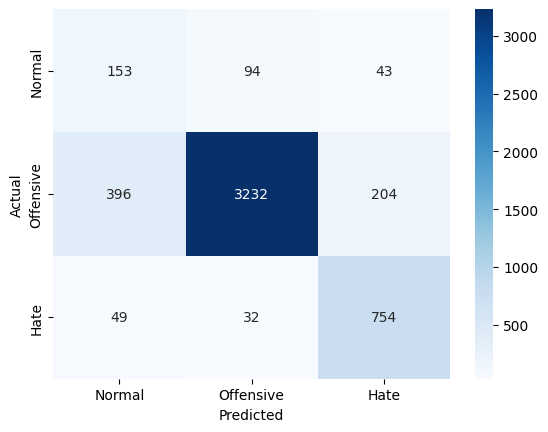

Random Forest:
Accuracy: 0.8712931208392173
Precision: 0.8774346349987299
Recall: 0.8712931208392173
F1-Score: 0.8738387011166835
              precision    recall  f1-score   support

      Normal       0.34      0.37      0.35       290
   Offensive       0.94      0.91      0.92      3832
        Hate       0.78      0.86      0.82       835

    accuracy                           0.87      4957
   macro avg       0.69      0.72      0.70      4957
weighted avg       0.88      0.87      0.87      4957



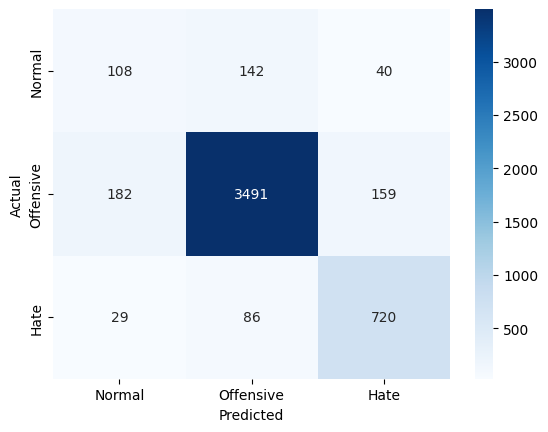

Support Vector Machine:
Accuracy: 0.8297357272543877
Precision: 0.8887702596974465
Recall: 0.8297357272543877
F1-Score: 0.8518667641625789
              precision    recall  f1-score   support

      Normal       0.23      0.54      0.33       290
   Offensive       0.96      0.84      0.89      3832
        Hate       0.78      0.90      0.84       835

    accuracy                           0.83      4957
   macro avg       0.66      0.76      0.69      4957
weighted avg       0.89      0.83      0.85      4957



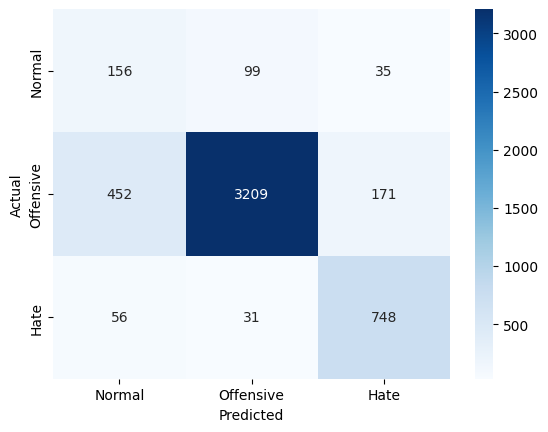

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final.csv')

# Ensure all entries in 'tweet' column are strings and handle NaNs
df['tweet'] = df['tweet'].astype(str).fillna('')

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the tweets to TF-IDF features
X = vectorizer.fit_transform(df['tweet']).toarray()

# The target variable is named 'class' and is already cleaned
y = df['class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Offensive', 'Hate']))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Offensive', 'Hate'], yticklabels=['Normal', 'Offensive', 'Hate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
print("Logistic Regression:")
train_and_evaluate(log_reg, X_train_resampled, y_train_resampled, X_test, y_test)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
print("Random Forest:")
train_and_evaluate(rf_clf, X_train_resampled, y_train_resampled, X_test, y_test)

# Support Vector Machine
svm_clf = SVC(kernel='linear', probability=True)
print("Support Vector Machine:")
train_and_evaluate(svm_clf, X_train_resampled, y_train_resampled, X_test, y_test)


# Random Forest hypertunning

Random Forest:
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8696792414766996
Precision: 0.8798897820318867
Recall: 0.8696792414766996
F1-Score: 0.8735542140088549
              precision    recall  f1-score   support

      Normal       0.34      0.40      0.37       290
   Offensive       0.95      0.90      0.92      3832
        Hate       0.76      0.88      0.82       835

    accuracy                           0.87      4957
   macro avg       0.68      0.73      0.70      4957
weighted avg       0.88      0.87      0.87      4957



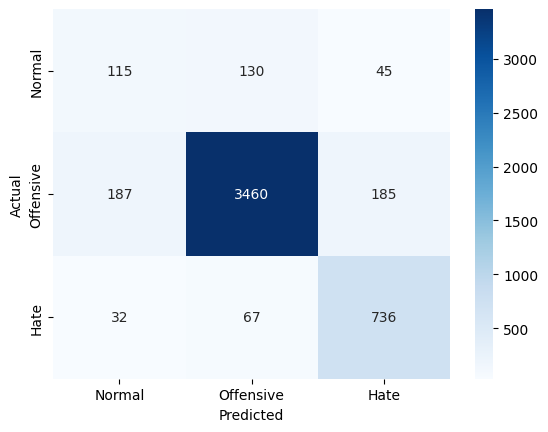

['tfidf_vectorizer.pkl']

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import joblib

# Load the dataset
df = pd.read_csv('final.csv')

# Ensure all entries in 'tweet' column are strings and handle NaNs
df['tweet'] = df['tweet'].astype(str).fillna('')

# Initialize the TF-IDF Vectorizer with reduced features
vectorizer = TfidfVectorizer(max_features=2000)  # Adjust max_features as needed

# Fit and transform the tweets to TF-IDF features
X = vectorizer.fit_transform(df['tweet'])

# Convert to sparse matrix if not already
X = csr_matrix(X)

# The target variable is named 'class' and is already cleaned
y = df['class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Offensive', 'Hate']))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Offensive', 'Hate'], yticklabels=['Normal', 'Offensive', 'Hate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def grid_search_cv(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Random Forest
print("Random Forest:")
best_rf_clf = grid_search_cv(RandomForestClassifier(), rf_params, X_train_resampled, y_train_resampled)
train_and_evaluate(best_rf_clf, X_train_resampled, y_train_resampled, X_test, y_test)

# Save the model and the vectorizer
joblib.dump(best_rf_clf, 'random_forest_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


In [4]:
import joblib
import pandas as pd
from scipy.sparse import csr_matrix

# Load the saved model and vectorizer
loaded_model = joblib.load('random_forest_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Load new data (if needed)
new_df = pd.read_csv('final.csv')

# Ensure all entries in 'tweet' column are strings and handle NaNs
new_df['tweet'] = new_df['tweet'].astype(str).fillna('')

# Transform new data using the loaded vectorizer
new_X = loaded_vectorizer.transform(new_df['tweet'])

# Convert to sparse matrix if not already
new_X = csr_matrix(new_X)

# Make predictions using the loaded model
new_predictions = loaded_model.predict(new_X)

# Display predictions
print(new_predictions)


[2 1 1 ... 1 1 2]


# Logistic Regression hypertunning

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Logistic Regression:
Accuracy: 0.8291305224934437
Precision: 0.8751947493908009
Recall: 0.8291305224934437
F1-Score: 0.8479204758337052
              precision    recall  f1-score   support

      Normal       0.23      0.48      0.31       290
   Offensive       0.95      0.86      0.90      3832
        Hate       0.77      0.82      0.79       835

    accuracy                           0.83      4957
   macro avg       0.65      0.72      0.67      4957
weighted avg       0.88      0.83      0.85      4957



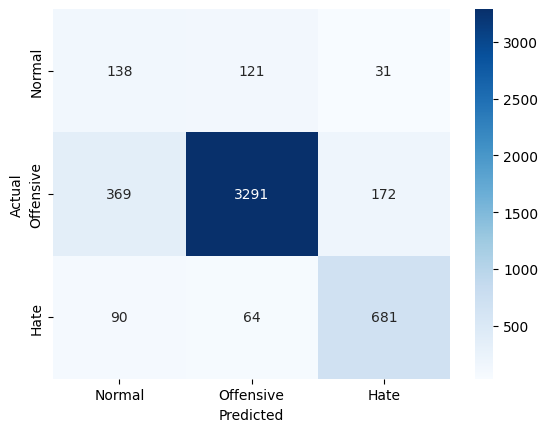

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final.csv')

# Ensure all entries in 'tweet' column are strings and handle NaNs
df['tweet'] = df['tweet'].astype(str).fillna('')

# Initialize the TF-IDF Vectorizer with fewer features
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the tweets to TF-IDF features
X = vectorizer.fit_transform(df['tweet']).toarray()

# The target variable is named 'class' and is already cleaned
y = df['class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reduce the size of the dataset for hyperparameter tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train_resampled, y_train_resampled, test_size=0.8, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on the smaller dataset
grid_search.fit(X_train_small, y_train_small)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Offensive', 'Hate']))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Offensive', 'Hate'], yticklabels=['Normal', 'Offensive', 'Hate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate the best logistic regression model
print("Logistic Regression:")
train_and_evaluate(best_log_reg, X_train_resampled, y_train_resampled, X_test, y_test)
